Olá, Desejado

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Precisa criar uma apresentação conforme descrição do projeto (infelizmente só tenho acesso em inglês): Make a presentation of your research to share with investors. You can use any tool you’d like to create it, but you must convert your presentation to PDF format for assessment. Include a link to the presentation in a markdown cell in the following format:</span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>




<div class="alert alert-block alert-success">
<b> Comentário final do revisor: </b> <a class="tocSkip"></a>

Tudo certo agora. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Caminho do arquivo
default_file_path = '/datasets/rest_data_us_upd.csv'

# 1. Carregar os dados
df = pd.read_csv(default_file_path)

# 2. Verificar tipos de dados iniciais
def print_dtypes(dataframe):
    print("Tipos de dados antes da conversão:")
    print(dataframe.dtypes)

print_dtypes(df)

Tipos de dados antes da conversão:
id              int64
object_name    object
address        object
chain          object
object_type    object
number          int64
dtype: object


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

É importante separar importação da letirua de csv.
</div>


In [34]:
df['chain'].unique()

array([False, True, nan], dtype=object)

In [35]:


# 3. Converter colunas para tipos apropriados
# object_name, object_type, address como 'category'
# chain para booleano
# number para Int64 para lidar com nulos
df['object_name'] = df['object_name'].astype('category')
df['object_type'] = df['object_type'].astype('category')
df['address'] = df['address'].astype('category')

# Normalizar e converter 'chain' para booleano, tratando valores ausentes
chain_mapping = {
    True: True, False: False,
    'TRUE': True, 'FALSE': False,
    'True': True, 'False': False,
    1: True, 0: False
}
df['chain'] = df['chain'].map(chain_mapping)




<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual a utilidade de chain_mapping? Os valores estão True, False ou nan
</div>

In [36]:
df = df.dropna(subset=['chain'])

In [37]:
df.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [38]:
# 4. Verificar e tratar valores ausentes
print("Contagem de valores ausentes por coluna:")
print(df.isnull().sum())

df = df.dropna(subset=['chain', 'number'])  # remover linhas críticas

df['number'] = pd.to_numeric(df['number'], errors='coerce').astype('Int64')  # converter número

# 5. Verificar e remover duplicados
initial_count = len(df)
after_dedup_count = df.drop_duplicates().shape[0]
removed_dupes = initial_count - after_dedup_count
print(f"Linhas duplicadas removidas: {removed_dupes}")
df = df.drop_duplicates()

# 6. Resumo final
def summary(dataframe):
    print("\nResumo dos dados preparados:")
    dataframe.info()
    print(dataframe.describe(include='all'))

summary(df)

Contagem de valores ausentes por coluna:
id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64
Linhas duplicadas removidas: 0

Resumo dos dados preparados:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9648 non-null   int64   
 1   object_name  9648 non-null   category
 2   address      9648 non-null   category
 3   chain        9648 non-null   object  
 4   object_type  9648 non-null   category
 5   number       9648 non-null   Int64   
dtypes: Int64(1), category(3), int64(1), object(1)
memory usage: 1008.6+ KB
                  id                 object_name              address  chain  \
count    9648.000000                        9648                 9648   9648   
unique           NaN                        8669                 8509      2   
top              


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

 Dados valem ouro. Para descartar, precisa analisar criteriosa. Qual é o impacto do descarte? Veja que eu calculei que há 3 nans em Chain
</div>


In [39]:
# 7. Proporções de tipos de estabelecimentos
type_counts = df['object_type'].value_counts()
type_props = df['object_type'].value_counts(normalize=True)

# Imprimir resultados legíveis
print("\nProporções e contagens de cada tipo de estabelecimento:")
for tipo in type_counts.index:
    count = type_counts[tipo]
    prop = type_props[tipo]
    print(f"- {tipo}: {count} estabelecimentos, representando {prop:.2%} do total")


Proporções e contagens de cada tipo de estabelecimento:
- Restaurant: 7253 estabelecimentos, representando 75.18% do total
- Fast Food: 1066 estabelecimentos, representando 11.05% do total
- Cafe: 435 estabelecimentos, representando 4.51% do total
- Pizza: 319 estabelecimentos, representando 3.31% do total
- Bar: 292 estabelecimentos, representando 3.03% do total
- Bakery: 283 estabelecimentos, representando 2.93% do total


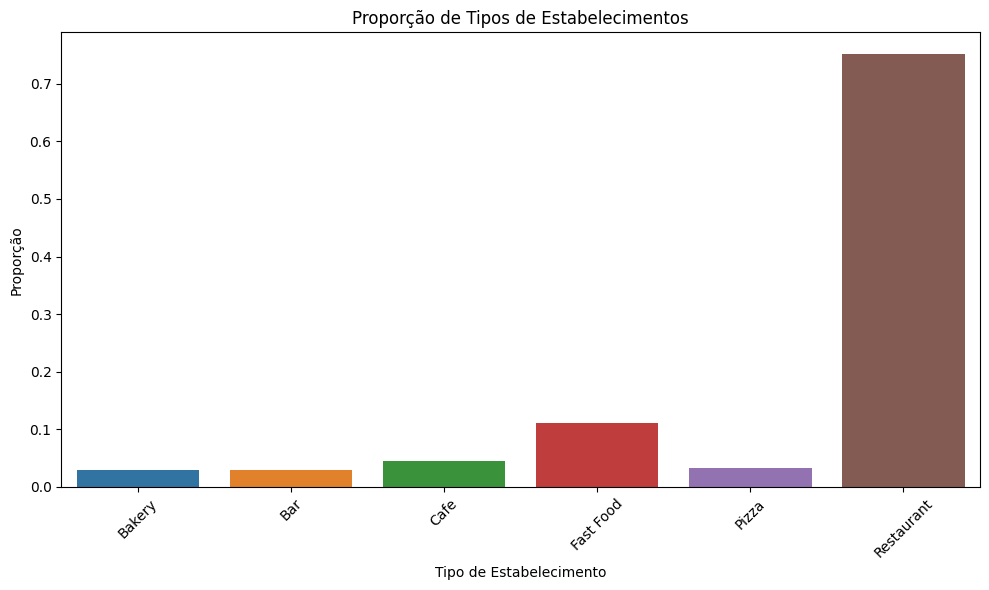

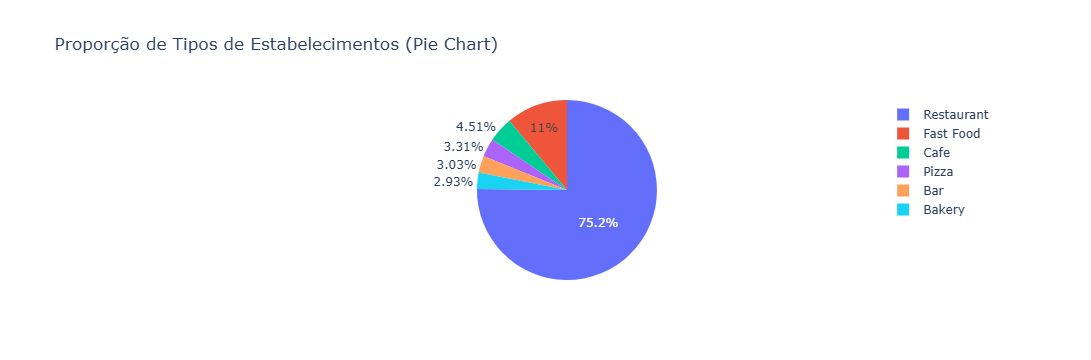

In [40]:
# 8. Gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=type_props.index, y=type_props.values)
plt.title('Proporção de Tipos de Estabelecimentos')
plt.ylabel('Proporção')
plt.xlabel('Tipo de Estabelecimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Gráfico de pizza interativo com Plotly
fig = px.pie(
    names=type_props.index,
    values=type_props.values,
    title='Proporção de Tipos de Estabelecimentos (Pie Chart)'
)
fig.show()

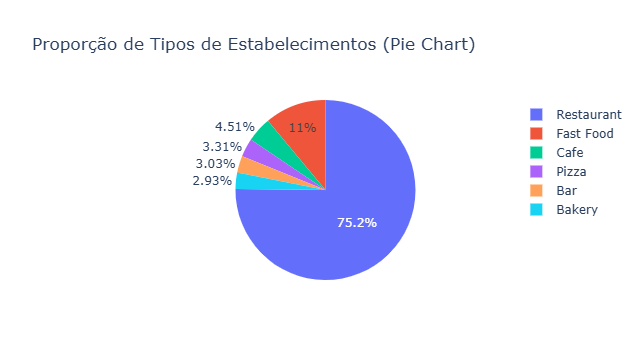

Proporções e contagens de estabelecimentos de rede vs não rede:
- Não rede: 5972 estabelecimentos, representando 61.90% do total
- Rede: 3676 estabelecimentos, representando 38.10% do total


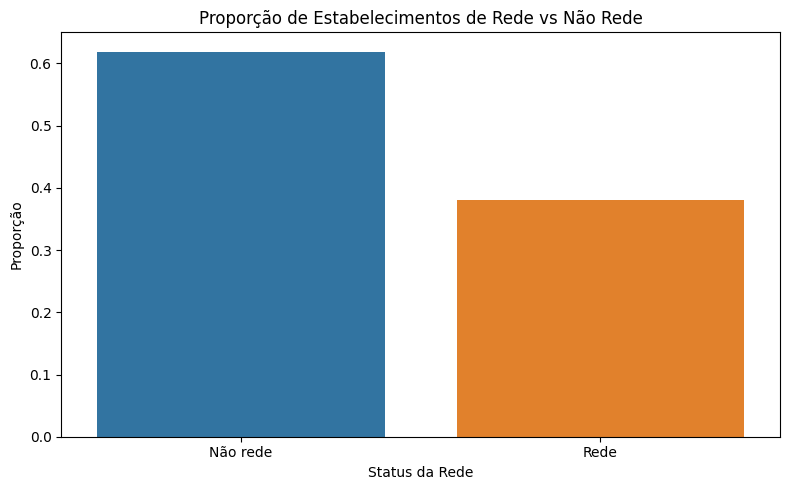

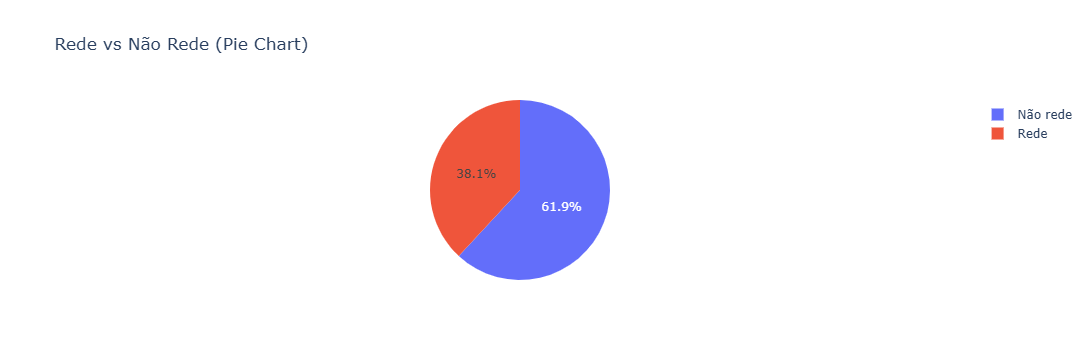

In [41]:
# 9. Gráfico de pizza interativo com Plotly
fig = px.pie(
    names=type_props.index,
    values=type_props.values,
    title='Proporção de Tipos de Estabelecimentos (Pie Chart)'
)
fig.show()

# 10. Proporções de estabelecimentos de rede vs não rede
chain_counts = df['chain'].value_counts()
chain_props = df['chain'].value_counts(normalize=True)

# Imprimir resultados legíveis
print("Proporções e contagens de estabelecimentos de rede vs não rede:")
for status in chain_counts.index:
    label = 'Rede' if status else 'Não rede'
    count = chain_counts[status]
    prop = chain_props[status]
    print(f"- {label}: {count} estabelecimentos, representando {prop:.2%} do total")

# Gráfico de barras com Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=[ 'Não rede', 'Rede' ], y=[chain_props[False], chain_props[True]])
plt.title('Proporção de Estabelecimentos de Rede vs Não Rede')
plt.ylabel('Proporção')
plt.xlabel('Status da Rede')
plt.tight_layout()
plt.show()

# 11. Gráfico de pizza interativo com Plotly para rede vs não rede
fig2 = px.pie(
    names=['Não rede', 'Rede'],
    values=[chain_props[False], chain_props[True]],
    title='Rede vs Não Rede (Pie Chart)'
)
fig2.show()

Tipos de estabelecimento mais comuns em redes:
- Restaurant: 2292 redes, representando 62.35% das unidades de rede
- Fast Food: 605 redes, representando 16.46% das unidades de rede
- Bakery: 283 redes, representando 7.70% das unidades de rede
- Cafe: 266 redes, representando 7.24% das unidades de rede
- Pizza: 153 redes, representando 4.16% das unidades de rede
- Bar: 77 redes, representando 2.09% das unidades de rede


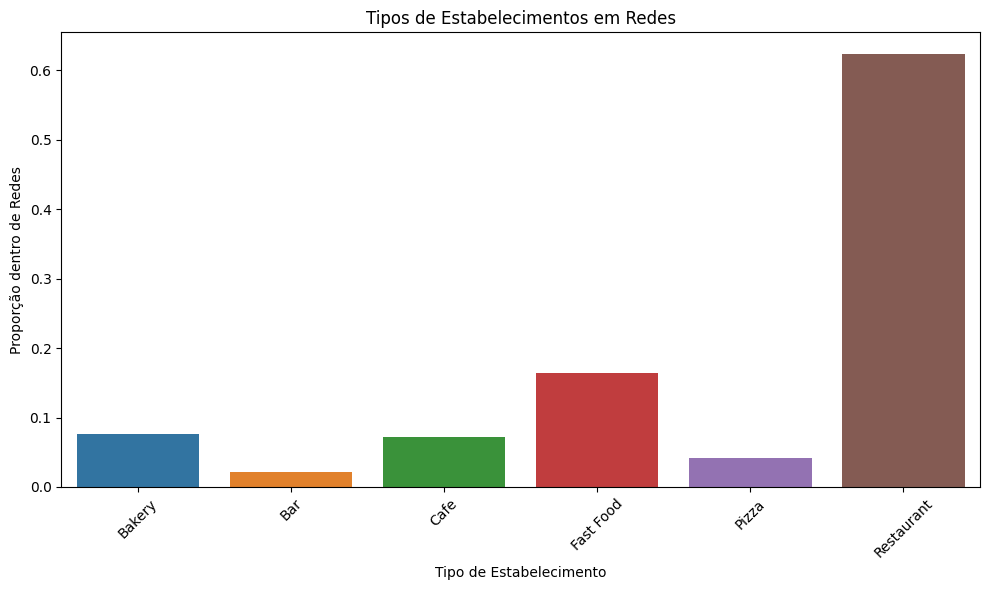

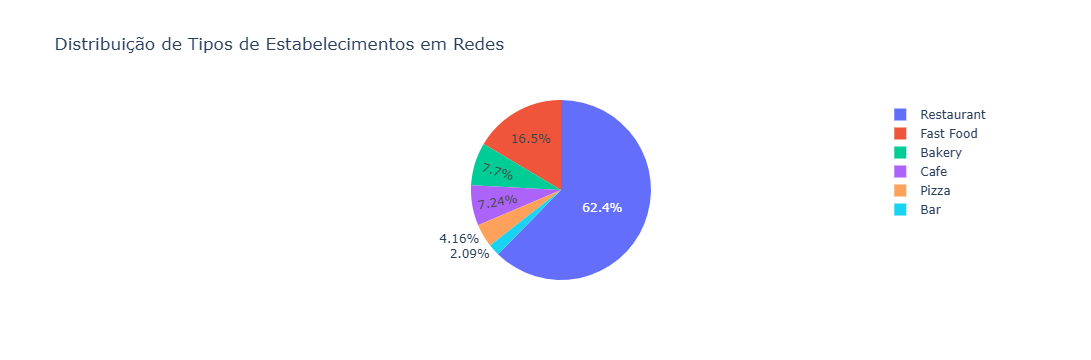

In [42]:
# 12. Tipo de estabelecimento típico para redes
# Filtrar apenas estabelecimentos de rede
chain_types = df[df['chain'] == True]['object_type']
chain_type_counts = chain_types.value_counts()
chain_type_props = chain_types.value_counts(normalize=True)

print("Tipos de estabelecimento mais comuns em redes:")
for tipo in chain_type_counts.index:
    count = chain_type_counts[tipo]
    prop = chain_type_props[tipo]
    print(f"- {tipo}: {count} redes, representando {prop:.2%} das unidades de rede")

# Gráfico de barras para tipo em redes
plt.figure(figsize=(10, 6))
sns.barplot(x=chain_type_props.index, y=chain_type_props.values)
plt.title('Tipos de Estabelecimentos em Redes')
plt.ylabel('Proporção dentro de Redes')
plt.xlabel('Tipo de Estabelecimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pizza para tipo em redes
fig3 = px.pie(
    names=chain_type_props.index,
    values=chain_type_props.values,
    title='Distribuição de Tipos de Estabelecimentos em Redes'
)
fig3.show()


Estatísticas de número de assentos por tipo de estabelecimento (Rede vs Não rede):
        count       mean        std  min   25%   50%   75%    max
chain                                                            
False  5972.0  46.171467  49.875746  1.0  14.0  28.0  47.0  229.0
True   3676.0  39.694233  43.437212  1.0  13.0  25.0  44.0  229.0
- Não rede: média de 46.2 assentos, mediana de 28 assentos
- Rede: média de 39.7 assentos, mediana de 25 assentos


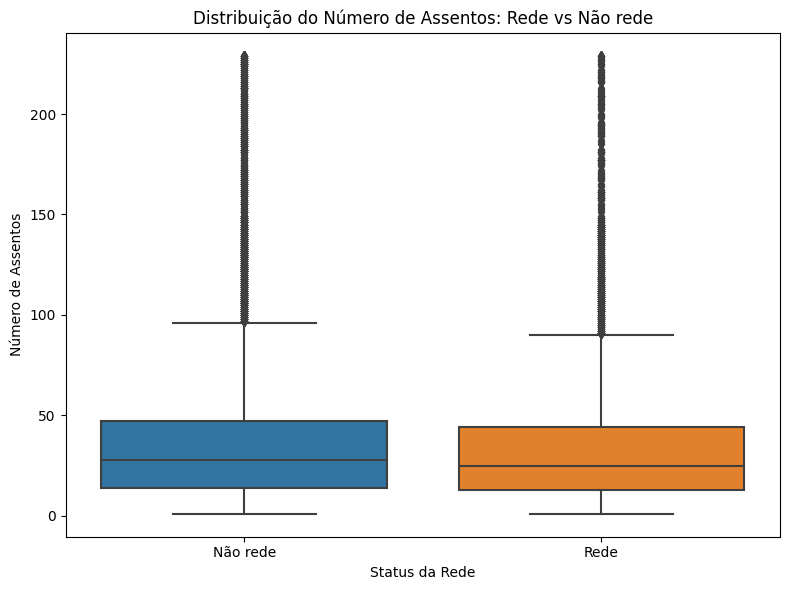

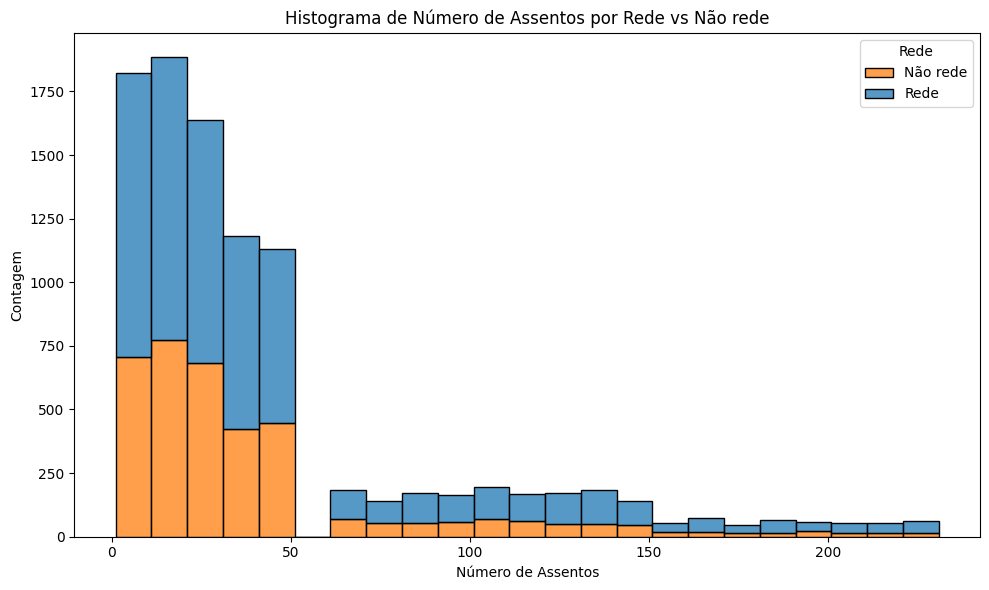

In [43]:
# 13. Análise de assentos em rede vs não rede
# Estatísticas descritivas do número de assentos
seats_stats = df.groupby('chain')['number'].describe()

print("Estatísticas de número de assentos por tipo de estabelecimento (Rede vs Não rede):")
print(seats_stats)

# Imprimir média e mediana de forma legível
for status in [False, True]:
    label = 'Rede' if status else 'Não rede'
    mean_seats = seats_stats.loc[status, 'mean']
    median_seats = seats_stats.loc[status, '50%']
    print(f"- {label}: média de {mean_seats:.1f} assentos, mediana de {median_seats:.0f} assentos")

# Boxplot comparativo com Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['chain'].map({False: 'Não rede', True: 'Rede'}), y=df['number'])
plt.title('Distribuição do Número de Assentos: Rede vs Não rede')
plt.ylabel('Número de Assentos')
plt.xlabel('Status da Rede')
plt.tight_layout()
plt.show()

# Histograma comparativo
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='number', hue='chain', multiple='stack', binwidth=10)
plt.title('Histograma de Número de Assentos por Rede vs Não rede')
plt.ylabel('Contagem')
plt.xlabel('Número de Assentos')
plt.legend(title='Rede', labels=['Não rede', 'Rede'])
plt.tight_layout()
plt.show()

Número médio de assentos por tipo de estabelecimento:
- Restaurant: média de 48.0 assentos
- Bar: média de 44.8 assentos
- Fast Food: média de 31.8 assentos
- Pizza: média de 28.5 assentos
- Cafe: média de 25.0 assentos
- Bakery: média de 21.8 assentos


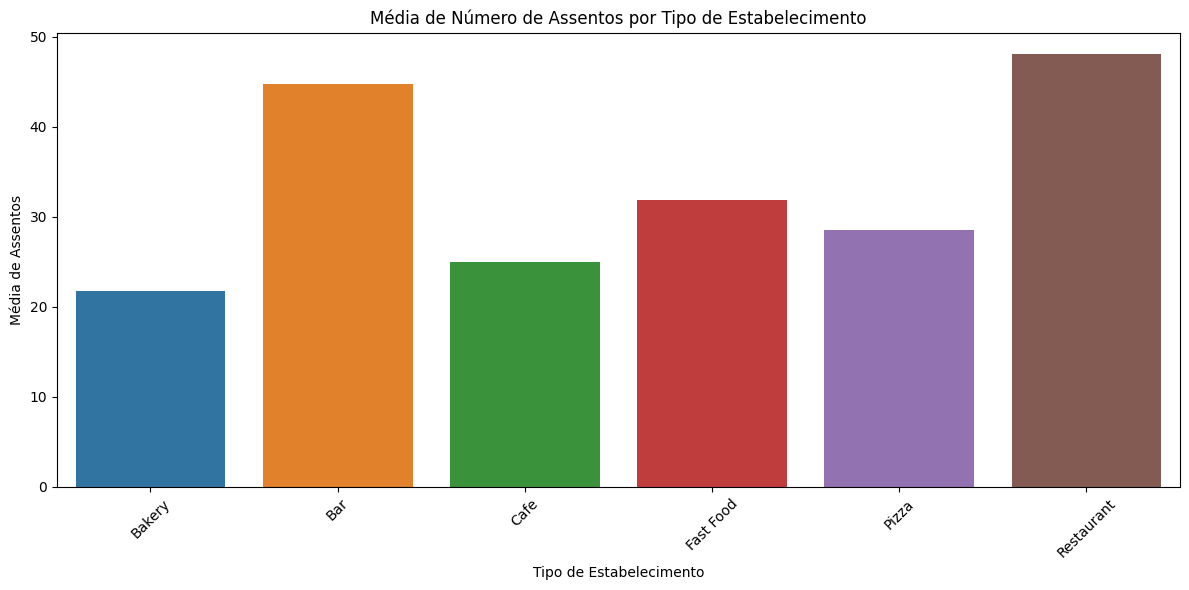

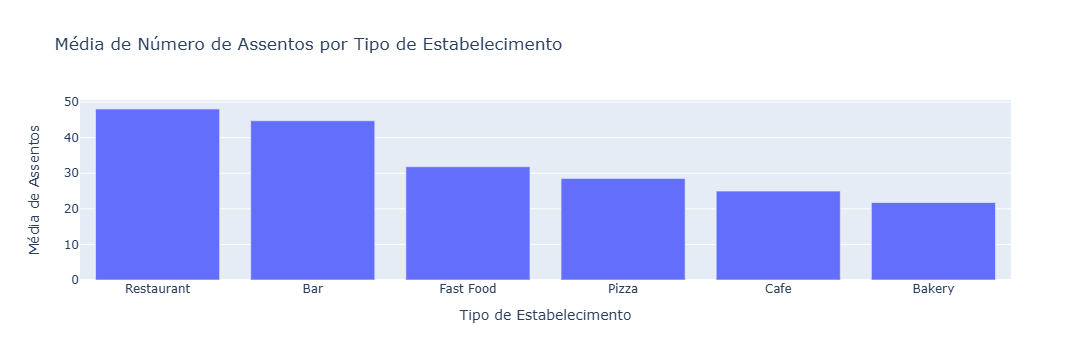

Tipo com maior número médio de assentos: Restaurant, com média de 48.0 assentos.


In [44]:
# 14. Número médio de assentos por tipo de restaurante
mean_seats_by_type = df.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Imprimir resultados legíveis
print("Número médio de assentos por tipo de estabelecimento:")
for tipo, mean_seats in mean_seats_by_type.items():
    print(f"- {tipo}: média de {mean_seats:.1f} assentos")

# Gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_seats_by_type.index, y=mean_seats_by_type.values)
plt.title('Média de Número de Assentos por Tipo de Estabelecimento')
plt.ylabel('Média de Assentos')
plt.xlabel('Tipo de Estabelecimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico interativo com Plotly
fig4 = px.bar(
    x=mean_seats_by_type.index,
    y=mean_seats_by_type.values,
    title='Média de Número de Assentos por Tipo de Estabelecimento',
    labels={'x': 'Tipo de Estabelecimento', 'y': 'Média de Assentos'}
)
fig4.show()

# Tipo com maior média de assentos (usando ordenação)
top_type = mean_seats_by_type.index[0]
top_value = mean_seats_by_type.iloc[0]
print(f"Tipo com maior número médio de assentos: {top_type}, com média de {top_value:.1f} assentos.")



Top 10 ruas com maior número de restaurantes:
- W SUNSET BLVD: 296 restaurantes
- W PICO BLVD: 288 restaurantes
- HOLLYWOOD BLVD: 167 restaurantes
- WILSHIRE BLVD: 161 restaurantes
- S VERMONT AVE: 148 restaurantes
- SANTA MONICA BLVD: 146 restaurantes
- W 3RD ST: 145 restaurantes
- BEVERLY BLVD: 135 restaurantes
- S FIGUEROA ST: 134 restaurantes
- S WESTERN AVE: 128 restaurantes


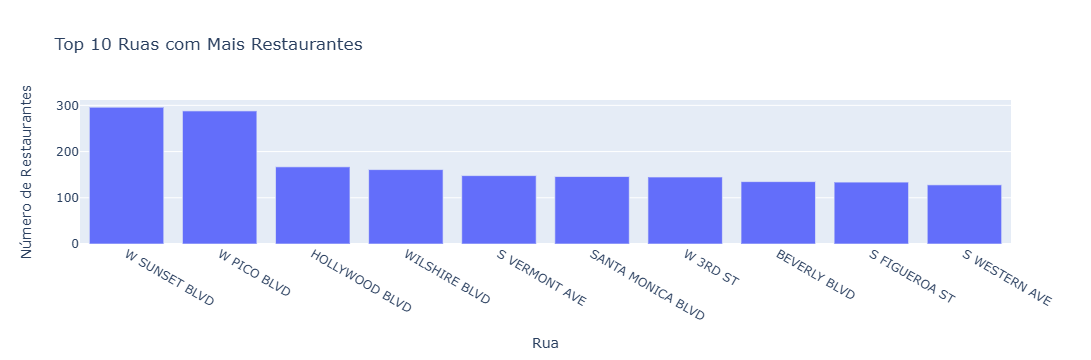

Gráfico interativo salvo em 'top10_streets.html'.


In [45]:
# 16. Extrair nome da rua e gráfico das top 10 ruas com mais restaurantes
# Extrair nome da rua (remover número inicial)
df['street'] = df['address'].astype(str).str.replace(r'^\d+\s+', '', regex=True).astype('category')

# Contar restaurantes por rua
street_counts = df['street'].value_counts().nlargest(10)

print("\nTop 10 ruas com maior número de restaurantes:")
for street, cnt in street_counts.items():
    print(f"- {street}: {cnt} restaurantes")

# Gráfico interativo usando Plotly.js (via plotly.express, com exportação HTML)
fig5 = px.bar(
    x=street_counts.index,
    y=street_counts.values,
    title='Top 10 Ruas com Mais Restaurantes',
    labels={'x': 'Rua', 'y': 'Número de Restaurantes'}
)
fig5.show()

# Salvar em HTML com plotly.js incluído
fig5.write_html('top10_streets.html', include_plotlyjs='cdn')
print("Gráfico interativo salvo em 'top10_streets.html'.")



Número de ruas com apenas um restaurante: 2450
Distribuição de número de assentos nas top 10 ruas:
- W SUNSET BLVD: média 50.9, mediana 35, min 1, max 229
- W PICO BLVD: média 40.9, mediana 27, min 1, max 205
- HOLLYWOOD BLVD: média 53.7, mediana 36, min 1, max 229
- WILSHIRE BLVD: média 62.1, mediana 40, min 3, max 229
- S VERMONT AVE: média 45.9, mediana 27, min 1, max 227
- SANTA MONICA BLVD: média 32.4, mediana 24, min 1, max 185
- W 3RD ST: média 43.9, mediana 31, min 1, max 161
- BEVERLY BLVD: média 44.8, mediana 29, min 1, max 218
- S FIGUEROA ST: média 50.8, mediana 28, min 3, max 226
- S WESTERN AVE: média 43.1, mediana 29, min 1, max 198


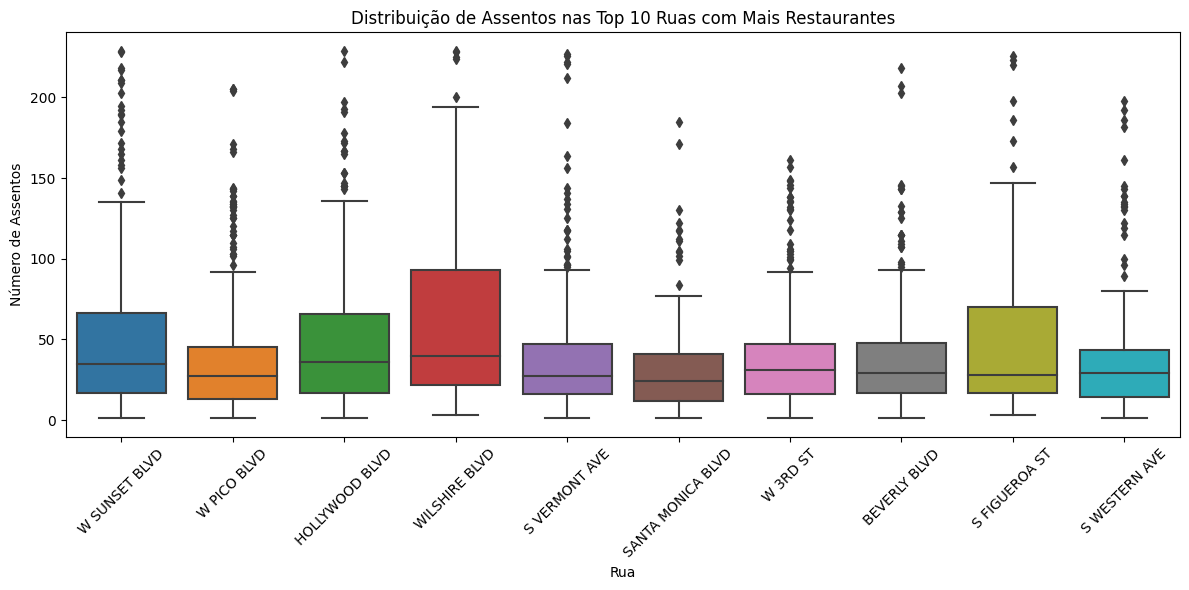

No handles with labels found to put in legend.


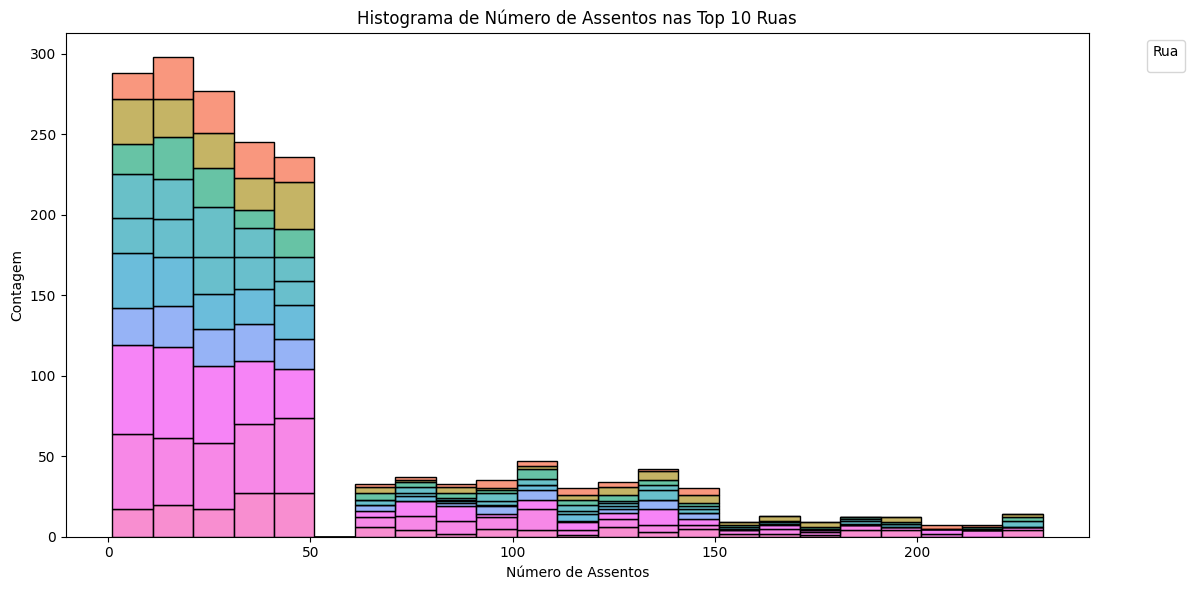

In [46]:
# 17. Número de ruas com apenas um restaurante
street_counts_all = df['street'].value_counts()
num_single = (street_counts_all == 1).sum()
print(f"Número de ruas com apenas um restaurante: {num_single}")

# 18. Análise de distribuição de assentos para ruas com muitos restaurantes
# Usar top 10 ruas como exemplo de "ruas com muitos restaurantes"
top_streets = street_counts_all.nlargest(10).index
top_streets_data = df[df['street'].isin(top_streets)]

print("Distribuição de número de assentos nas top 10 ruas:")
for street in top_streets:
    data = top_streets_data[top_streets_data['street'] == street]['number']
    print(f"- {street}: média {data.mean():.1f}, mediana {data.median():.0f}, min {data.min()}, max {data.max()}")

# Boxplot comparativo para top 10 ruas
plt.figure(figsize=(12, 6))
sns.boxplot(x='street', y='number', data=top_streets_data, order=top_streets)
plt.title('Distribuição de Assentos nas Top 10 Ruas com Mais Restaurantes')
plt.ylabel('Número de Assentos')
plt.xlabel('Rua')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma para as top 10 ruas (empilhado)
plt.figure(figsize=(12, 6))
sns.histplot(data=top_streets_data, x='number', hue='street', multiple='stack', binwidth=10)
plt.title('Histograma de Número de Assentos nas Top 10 Ruas')
plt.xlabel('Número de Assentos')
plt.ylabel('Contagem')
plt.legend(title='Rua', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Conclusões e Recomendações Gerais

Com base na análise dos dados de restaurantes em LA, seguem os principais insights e orientações:

1. **Rede vs Independente**
   - **61,9%** dos estabelecimentos são independentes; **38,1%** fazem parte de redes.
   - Redes têm **média de 39,7 assentos** (mediana 25) versus **46,2 assentos** (mediana 28) em não-redes, sugerindo operação mais enxuta e turnover rápido.

2. **Formato de Rede Mais Comum**
   - O tipo **“Restaurant”** domina as redes (62,4%), seguido de **Fast Food (16,5%)**, **Bakery/Café (~15%)**.
   - **Média de assentos em restaurants de rede**: 48,0 (mediana 36), com faixa ampla de 1 a 229 assentos.

3. **Tamanho Médio por Tipo**
   | Tipo        | Média de Assentos |
   |-------------|------------------:|
   | Restaurant  |               48,0|
   | Bar         |               44,8|
   | Fast Food   |               31,8|
   | Pizza       |               28,5|
   | Cafe        |               25,0|
   | Bakery      |               21,8|

   - Para **capacidade máxima**, priorize “Restaurant” ou “Bar”.
   - Formatos enxutos (Bakery, Café) favorecem custo operacional reduzido e alta rotatividade.

4. **Concorrência por Rua**
   - **Top 10 ruas** variam de 128 a 296 restaurantes, com medianas de 27 a 40 assentos.
   - **Ponto ideal** de capacidade em corredores intensos: **30–50 assentos**.
   - Há **2.450 ruas** com somente **1 restaurante**, oferecendo oportunidade de monopólio local.

5. **Recomendações para Expansão em Rede**
   - **Tipo Principal**: lançar modelo “Restaurant” (≈45 assentos) em 2–3 locais-piloto.
   - **Capacidade**: manter faixa **30–50 assentos**, ajustando para **40–60** em corredores principais.
   - **Localização**: priorizar ruas com baixa concorrência ou nichos ainda não explorados.
   - **Padronização**: otimizar processos e cardápio enxuto para turnover eficiente.



> **Sugestão de Próximos Passos**  
> - Testar diversas combinações de bairro, formato e tamanho de salão.  
> - Monitorar métricas de performance (ticket médio, rotatividade de mesas).  
> - Ajustar modelo antes de escalar para uma rede mais ampla.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa criar uma apresentação. Para isso, crie slide no google drive e compartilhe o link público. A apresentação deve conter: capa, objetivo, gráficos com insights, recomendações finais. Pense que você vai apresentar para um cliente ou seu gerente
</div>


https://docs.google.com/presentation/d/e/2PACX-1vQUq--Ezn1d4Y0jJJwaTjNXSacwh_nhOEo7b8tM705Rn863bESCWWDxH-35p7JNhTpoS3jO4OYesuKY/pub?start=false&loop=false&delayms=3000


<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

A apresentação está boa. Há gráficos, conclusões e recomendações. Porém, no slide de cada gráfico, convém apresentar análises. Em alguns, você reproduziu o que estava no gráfico. Como assim? No Pie Chart, discutir que 75% é restaurante, o que pode indicar saturação e pode-ser abrir outro tipo de estabelecimento.
</div>
